In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import ast
from collections import defaultdict
from tqdm import tqdm

In [25]:
# Set the path to the directory containing the subfolders
parent_directory = './runs'

# This list will hold all the numbers found
successes = {}
times = {}
args = {}
# Regular expression to find numbers
number_pattern = re.compile(r'\d+')
all_files = list(os.walk(parent_directory))
for root, dirs, files in tqdm(all_files):
    for file in files:
        if file.endswith(".log"):  # Checks if the file is a log file
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                args[file] = ast.literal_eval(lines[1])
                # print(float(file_path.split("--")[1].split("/")[0].replace("-", ".")))
                time = float(file_path.split("--")[1].split("/")[0].replace("-", "."))
                # if(args[file]["adaptive_n"]):
    
                #     continue
                
                
                for i, line in enumerate(lines):
                    if line.startswith("Solved:"):
                        
                        successes[file] = int(("True" in lines[i].strip()))

                        if (args[file]["adaptive_n"] and not successes[file]):
                            print(file_path)
                    if(line.startswith("Time:")):
                        # print(file_path)
                        times[file] = float(lines[i].strip().replace("Time: ", ""))
           


100%|██████████| 2701/2701 [00:00<00:00, 7199.10it/s]


In [23]:
print(len(times))
print(len(successes))
print(len(args))

plot_points = {}
plot_successes = defaultdict(list)
plot_times = defaultdict(list)
counter = 0
print(args.keys())
for key in times:
    print(key)
    if(args[key]["adaptive_n"]):
        counter += 1
    plot_successes[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(successes[key])
    plot_times[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(times[key])

513
513
1350
dict_keys(['1716404368.86411.log', '1716401548.1841497.log', '1716433507.1524298.log', '1716408086.5821729.log', '1716420871.7570274.log', '1716425423.4385762.log', '1716419668.4778435.log', '1716420871.6113265.log', '1716424044.109535.log', '1716422219.4015527.log', '1716434786.1539073.log', '1716407022.1235826.log', '1716434786.4637384.log', '1716411599.3741581.log', '1716422191.7543502.log', '1716422192.5253227.log', '1716400448.165621.log', '1716415018.8218508.log', '1716407022.4046686.log', '1716429308.174553.log', '1716400526.1009994.log', '1716401582.1275637.log', '1716409607.178809.log', '1716432807.0916731.log', '1716416971.1742449.log', '1716415049.2559927.log', '1716401548.3639326.log', '1716404368.6959274.log', '1716415018.7710261.log', '1716407022.119038.log', '1716433506.765771.log', '1716400518.9271803.log', '1716408086.7917578.log', '1716400336.48946.log', '1716416995.1034396.log', '1716429307.4189415.log', '1716425350.6102054.log', '1716425350.3931804.log'

25


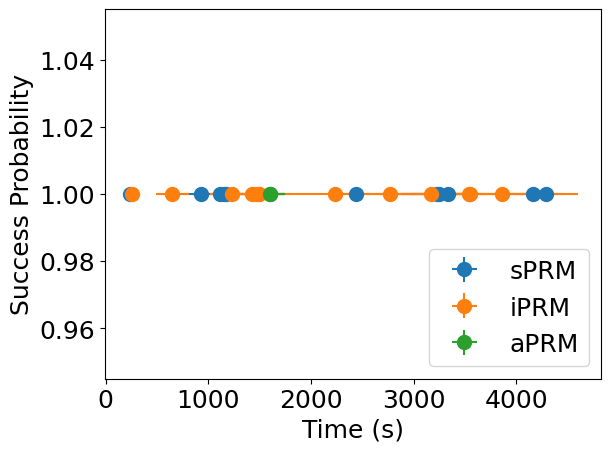

In [24]:

plt.rcParams.update({'font.size': 18})
plt.figure()
legend = ["sPRM", "iPRM", "aPRM"]
# Plot the sPRM results
for condition in legend:
    xs = []
    ys = []
    x_errs = []
    y_errs = []
    ns = []
    for k in plot_successes:
        min_samples, max_samples, adaptive_n = k
        
        if((condition == "iPRM" and (min_samples != max_samples-1 and not adaptive_n)) or
           (condition == "sPRM" and (min_samples == max_samples-1 and not adaptive_n)) or
           (condition == "aPRM" and (adaptive_n))):
            if(condition == "aPRM"):
                print(len(plot_times[k]))
            xs.append(np.mean(plot_times[k]))
            ys.append(np.mean(plot_successes[k]))
            x_errs.append(np.std(plot_times[k])/np.sqrt(len(plot_times[k])))
            y_errs.append(np.std(plot_successes[k])/np.sqrt(len(plot_successes[k])))
            ns.append(max_samples)

    plt.errorbar(xs, ys, xerr=x_errs, yerr=y_errs, markersize=10, fmt='o')

plt.legend(legend, loc="lower right")
plt.ylabel("Success Probability")
plt.xlabel("Time (s)")
plt.savefig('../../../figures/sample_plot.pdf', format='pdf',  bbox_inches='tight')